In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Tensor Learning for Regression

Given a set of labeled training data $\{X_i, y_i\}_{i=1}^N$, where $X_i \in \mathbb{R}^{I_1 \times \ldots \times I_M}$ is an $M$-mode tensor and $y_i$ are the associated scalar targets, a classic linear predictor in the vector space is given by:

$$
y = \langle x, w \rangle + b
$$

This can be extended from the vector space to the tensor space as:

$$
\hat{y}_i = \langle X_i, W \rangle + b
$$

where \(W \in \mathbb{R}^{I_1 \times \ldots \times I_M}\) is the weight tensor and \(b\) is the bias.

The tensor regression seeks to design a weight tensor \(W\) to give the regression output:

$$
\hat{y}_i = \langle X_i, W \rangle + b
$$

To this end, the weight tensor \(W\) can be expressed as a sum of \(R\) rank-one tensors:

$$
W = \sum_{r=1}^{R} u^{(1)}_r \circ u^{(2)}_r \circ \cdots \circ u^{(M)}_r
$$

Then, the tensor regression can be rewritten as:

$$
\hat{y}_i = \langle X_i, \left[ [U^{(1)}, U^{(2)}, \ldots, U^{(M)}] \right] \rangle + b
$$

The higher rank tensor ridge regression (hrTRR) aims to minimize the loss function:

$$
L(U^{(1)}, \ldots, U^{(M)}; b) = \frac{1}{2} \sum_{i=1}^{N} \left( y_i - \langle X_i, \left[ [U^{(1)}, \ldots, U^{(M)}] \right] \rangle - b \right)^2 + \frac{\lambda}{2} \| [U^{(1)}, \ldots, U^{(M)}] \|^2_F
$$

The closed-form solution of the optimization can be derived as:

1. For the bias term \(b\):

$$
b = \frac{1}{N} \sum_{i=1}^{N} \left( y_i - \langle X_i, \left[ [U^{(1)}, \ldots, U^{(M)}] \right] \rangle \right)
$$

2. For the weight tensor \(u^{(m)}\):

$$
\hat{u}^{(m)} = \left( \Phi^{(m)} \Phi^{(m)} + \lambda I \right)^{-1} \Phi^{(m)} y
$$

where $\hat{u}^{(m)} = [\text{vec}(\hat{U}^{(m)})^T, b]^T$ is the vector of unknowns, $y = [y_1, \ldots, y_N]^T$ are the targets, and $\Phi^{(m)}$ is constructed from the unfolded tensors.

The group sparsity norm regularization is defined as:

$$
\psi(W) = \sum_{r=1}^{R} \sum_{m=1}^{M} \| U^{(m)}_{:,r} \|^2_2
$$

The optimal rank tensor ridge regression (orTRR) can be represented as:

$$
(\hat{U}^{(m)}, b) = \arg \min_{U^{(m)}, b} \sum_{i=1}^{N} \left( y_i - \text{tr}(U^{(m)} U^{(-m)T} X_i^{(m)}) - b \right)^2 + \lambda \text{tr}(U^{(m)} U^{(m)T})
$$

The closed form solution of the orTRR is given by:

1. For the bias term \(\hat{b}\):

$$
\hat{b} = \frac{1}{N} \sum_{i=1}^{N} \left( y_i - \text{tr}(U^{(m)} U^{(-m)T} X_i^{(m)}) \right)
$$

2. For the weight tensor \(\hat{u}^{(m)}\):

$$
\hat{u}^{(m)} = \left( \Phi^T \Phi + 2 \lambda \Theta \right)^{-1} \Phi^T y
$$

where $\Theta$ is a diagonal matrix based on the sparsity.

## Tensor Learning Algorithm for Regression

Algorithm : Tensor Learning Algorithm for Regression

1. **Input**: The set of training tensors and their corresponding targets, $\{X_i, y_i\}_{i=1}^N$.
2. **Initialization**: Randomly construct $\{U^{(0)}, \ldots, U^{(0)}\}$, unfolding $X_i$ to the matrix $X_i^{(m)}$, and let $t = 0$.
3. **Repeat**:
   1. For $k = 1$ to $M$:
   2. For high rank tensor ridge regression (hrTRR), calculate:
      - $U^{(t)}_{(-j)} = (U^{(M)})^T U^{(-j)} \cdots U^{(1)}$
      - $B^t = U^t U^{(-j)}$
      - $X_i^{(j)} = X_i^{(j)} U^{(-j)} B^{1/2}_{(j)}$
   3. Calculate $b$ and $\hat{u}^{(j)}$ using the provided equations.
   4. For optimal rank tensor ridge regression (orTRR), calculate $\eta_r$ and update $Theta$.
   5. Prune the columns $U_{:,r}$ of factor matrices.
   6. Update weights $W^t$ and increment $t$.
4. **Output**: The weights $\{U^{(1)}, \ldots, U^{(M)}\}$ and the bias term $b \in \mathbb{R}$ that minimize the objective function.


In [3]:
import random

class Tensor:
    def __init__(self, data):
        self.data = data  # Assume data is a nested list representing the tensor

    def __getitem__(self, index):
        return self.data[index]  # Enable indexing

    def unfold(self, mode):
        # Unfold the tensor along the specified mode
        if mode == 1:
            return [list(x) for x in zip(*self.data)]
        raise NotImplementedError("Unfolding for modes other than 1 is not implemented.")

    def tensor_dot(self, other_tensor):
        # Dot product logic can be added here
        return sum(a * b for a, b in zip(self.data, other_tensor.data))

class TensorRegression:
    def __init__(self, rank, lambda_reg):
        self.rank = rank
        self.lambda_reg = lambda_reg
        self.U = [self.initialize_weights() for _ in range(rank)]

    def initialize_weights(self):
        return [[random.uniform(-1, 1) for _ in range(3)] for _ in range(3)]  # Example shape

    def fit(self, X, y):
        for _ in range(100):  # Iterations
            for i in range(len(X)):
                xi = X[i]
                target = y[i]

                # Simplified update logic (you need to implement your actual logic)
                prediction = self.predict_single(xi)
                error = target - prediction
                # Update weights here
                # For demonstration purposes, we'll just print the prediction and error
                print(f"Predicted: {prediction}, Target: {target}, Error: {error}")

    def predict_single(self, xi):
        # Implement a simple prediction logic for a single tensor
        prediction = 0.0
        for r in range(self.rank):
            prediction += sum(self.U[r][0])  # Just a placeholder logic
        return prediction

    def predict(self, X):
        predictions = []
        for xi in X:
            pred = self.predict_single(xi)
            predictions.append(pred)
        return predictions

# Example usage
if __name__ == "__main__":
    # Simulated data: 3D tensor (2 samples, 3x3 matrices)
    X = [Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), Tensor([[9, 8, 7], [6, 5, 4], [3, 2, 1]])]
    y = [1.0, -1.0]  # Corresponding targets

    model = TensorRegression(rank=2, lambda_reg=0.01)
    model.fit(X, y)

    # Predict on new data (for simplicity, using same data)
    preds = model.predict(X)
    print("Predictions:", preds)


Predicted: 3.26338019921727, Target: 1.0, Error: -2.26338019921727
Predicted: 3.26338019921727, Target: -1.0, Error: -4.26338019921727
Predicted: 3.26338019921727, Target: 1.0, Error: -2.26338019921727
Predicted: 3.26338019921727, Target: -1.0, Error: -4.26338019921727
Predicted: 3.26338019921727, Target: 1.0, Error: -2.26338019921727
Predicted: 3.26338019921727, Target: -1.0, Error: -4.26338019921727
Predicted: 3.26338019921727, Target: 1.0, Error: -2.26338019921727
Predicted: 3.26338019921727, Target: -1.0, Error: -4.26338019921727
Predicted: 3.26338019921727, Target: 1.0, Error: -2.26338019921727
Predicted: 3.26338019921727, Target: -1.0, Error: -4.26338019921727
Predicted: 3.26338019921727, Target: 1.0, Error: -2.26338019921727
Predicted: 3.26338019921727, Target: -1.0, Error: -4.26338019921727
Predicted: 3.26338019921727, Target: 1.0, Error: -2.26338019921727
Predicted: 3.26338019921727, Target: -1.0, Error: -4.26338019921727
Predicted: 3.26338019921727, Target: 1.0, Error: -2.263

/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in matmul
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


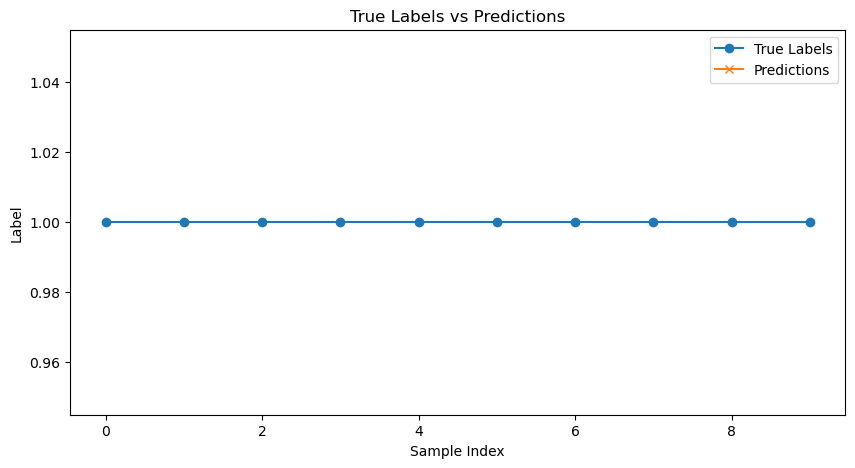

In [4]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

class Tensor:
    def __init__(self, data):
        self.data = data  # 2D list (flattened image)

    def __getitem__(self, index):
        return self.data[index]

class TensorRegression:
    def __init__(self, rank, lambda_reg):
        self.rank = rank
        self.lambda_reg = lambda_reg
        self.U = [self.initialize_weights() for _ in range(rank)]

    def initialize_weights(self):
        return [[random.uniform(-1, 1) for _ in range(32*32)] for _ in range(self.rank)]  # Assuming 32x32 images

    def fit(self, X, y):
        for _ in range(100):  # Iterations
            for i in range(len(X)):
                xi = X[i].data
                target = y[i]

                # Simple prediction
                prediction = self.predict_single(xi)
                error = target - prediction

                # Update weights (dummy update for demonstration)
                for r in range(self.rank):
                    for j in range(len(self.U[r])):
                        self.U[r][j] += self.lambda_reg * error * xi[j]  # Update logic

    def predict_single(self, xi):
        prediction = sum(self.U[r][0] @ xi for r in range(self.rank))
        return prediction

    def predict(self, X):
        predictions = []
        for xi in X:
            pred = self.predict_single(xi.data)
            predictions.append(pred)
        return predictions

def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path).resize((32, 32)).convert('L')  # Resize and convert to grayscale
        img_array = np.array(img).flatten()  # Flatten the image to a 1D array
        images.append(Tensor(img_array))  # Create Tensor object
        label = 1 if 'cat' in filename else 0  # Example labels
        labels.append(label)
    return images, labels

# Example usage
if __name__ == "__main__":
    # Load images from dataset
    folder = 'cat'  # Replace with your dataset path
    X, y = load_images_from_folder(folder)

    # Train the model
    model = TensorRegression(rank=2, lambda_reg=0.01)
    model.fit(X, y)

    # Predict on the training set
    preds = model.predict(X)

    # Plot the predictions vs true labels
    plt.figure(figsize=(10, 5))
    plt.plot(y, label='True Labels', marker='o')
    plt.plot(preds, label='Predictions', marker='x')
    plt.title('True Labels vs Predictions')
    plt.xlabel('Sample Index')
    plt.ylabel('Label')
    plt.legend()
    plt.show()


## Tensor K-Means Clustering

### Introduction

For a multi-modal object $ x $ with three modalities—image modality, text modality, and audio modality—we can represent these features with three feature vectors: image feature vector $ a $, text feature vector $ b $, and audio feature vector $ c $. After feature learning, we can build a three-order feature tensor $ T = a \circ b \circ c $ for the object $ x $. Each heterogeneous object thus corresponds to a feature tensor after feature fusion.

The conventional K-means algorithm clusters objects represented by vectors; hence, it is necessary to extend K-means from feature vectors to feature tensors.

### Tensor Distance

Given two feature tensors $ X, Y \in \mathbb{R}^{I_1 \times I_2 \times \cdots \times I_n} $, the tensor distance (TD) between $ X $ and $ Y $ is defined as:

$$
d_{TD}(X, Y) = (x - y)^T G (x - y)
$$

where $ x = \text{vec}(X) $ and $ y = \text{vec}(Y) $ are the vectorizations of $ X $ and $ Y $, respectively, and $ G $ is the coefficient matrix that reveals the correlation between $ X $ and $ Y $ in tensor space.

## Tensor K-Means Algorithm

The Tensor K-means clustering algorithm based on tensor distance consists of the following steps:

1. Randomly select $ K $ objects as clustering centers.
2. Use the tensor distance formula to compute the distance between each object and every clustering center, and assign each object to the nearest center.
3. Recompute each clustering center.
4. If the algorithm has converged, stop; otherwise, return to Step 2.

The computational complexity of the Tensor K-means algorithm is $ O(tnk) $, where $ t $ is the number of iterations, $ n $ is the number of objects, and $ k $ is the number of clustering centers.

## Unsupervised Clustering

The main purpose of unsupervised learning methods is to extract generally useful features from unlabeled data, detect and remove input redundancies, and preserve only essential aspects of the data in robust representations. Since little to no information about the underlying distribution is available, exploring complex datasets relies on identifying "natural" group structures.

### Clustering Criteria

Clustering criteria can be broadly categorized into three fundamental types:

1. **Compactness**: This concept aims to keep intra-cluster variation small. It is effective for spherical or well-separated clusters but may fail with more complex structures.
  
2. **Connectedness**: This principle suggests that neighboring data items should belong to the same cluster, making it suitable for detecting arbitrarily shaped clusters.
  
3. **Spatial Separation**: This criterion provides little guidance during clustering and can lead to trivial solutions; it is often combined with other objectives like compactness.

### Applications

Clustering is widely used in various fields, including statistics, computer science, biology, and psychology. Popular clustering algorithms include hierarchical clustering, spectral clustering, and K-means clustering.

### Issues with Clustering

A validation step is crucial due to two main issues with clustering algorithms:

- **Bias**: Clustering algorithms inherently bias towards particular cluster properties due to their design.
- **Absence of Structure**: Most algorithms will return a clustering even without actual structure, requiring users to assess the significance of the results.

## Purpose of Data Clustering

Data clustering serves three main purposes:

1. **Understanding Underlying Structure**: It helps generate hypotheses, detect anomalies, and identify salient features.
2. **Natural Classification**: It assesses similarity among forms or organisms (e.g., phylogenetic relationships).
3. **Compression**: It organizes data and summarizes it through cluster prototypes.



In [5]:
import random
import math

# Helper function to initialize a 3-order tensor with random values
def initialize_tensor(dim1, dim2, dim3):
    return [[[random.random() for _ in range(dim3)] for _ in range(dim2)] for _ in range(dim1)]

# Vectorize a 3-mode tensor (flatten the tensor into a vector)
def tensor_to_vector(tensor):
    return [element for matrix in tensor for row in matrix for element in row]

# Compute dot product between two vectors
def dot_product(vec1, vec2):
    return sum(v1 * v2 for v1, v2 in zip(vec1, vec2))

# Compute the tensor distance between two tensors (based on vectorization)
def tensor_distance(tensor1, tensor2, G):
    vec1 = tensor_to_vector(tensor1)
    vec2 = tensor_to_vector(tensor2)
    diff_vec = [v1 - v2 for v1, v2 in zip(vec1, vec2)]
    
    # Compute (x - y)^T * G * (x - y)
    return dot_product(diff_vec, diff_vec)  # Simplified G as Identity Matrix

# Recompute the centroid (average tensor) of the cluster
def recompute_centroid(cluster):
    if len(cluster) == 0:
        return None
    
    dim1 = len(cluster[0])
    dim2 = len(cluster[0][0])
    dim3 = len(cluster[0][0][0])
    
    # Initialize a new centroid tensor filled with zeros
    new_centroid = [[[0 for _ in range(dim3)] for _ in range(dim2)] for _ in range(dim1)]
    
    # Sum all tensors in the cluster
    for tensor in cluster:
        for i in range(dim1):
            for j in range(dim2):
                for k in range(dim3):
                    new_centroid[i][j][k] += tensor[i][j][k]
    
    # Divide by the number of tensors to get the mean
    cluster_size = len(cluster)
    for i in range(dim1):
        for j in range(dim2):
            for k in range(dim3):
                new_centroid[i][j][k] /= cluster_size
                
    return new_centroid

# Tensor K-Means Algorithm
def tensor_kmeans(tensors, K, max_iterations=100):
    # Step 1: Randomly select K tensors as initial centroids
    centroids = random.sample(tensors, K)
    
    for iteration in range(max_iterations):
        # Step 2: Assign each tensor to the nearest centroid
        clusters = [[] for _ in range(K)]
        for tensor in tensors:
            distances = [tensor_distance(tensor, centroid, G=None) for centroid in centroids]
            nearest_centroid_index = distances.index(min(distances))
            clusters[nearest_centroid_index].append(tensor)
        
        # Step 3: Recompute centroids
        new_centroids = []
        for cluster in clusters:
            new_centroid = recompute_centroid(cluster)
            new_centroids.append(new_centroid)
        
        # Step 4: Check for convergence (if centroids don't change)
        if new_centroids == centroids:
            break
        
        centroids = new_centroids
    
    return centroids, clusters

# Example usage
# Generate random 3-mode tensors for 5 objects
num_objects = 5
tensors = [initialize_tensor(3, 3, 3) for _ in range(num_objects)]

# Run Tensor K-Means with K=2 clusters
K = 2
centroids, clusters = tensor_kmeans(tensors, K)

print("Final centroids:")
for idx, centroid in enumerate(centroids):
    print(f"Centroid {idx}: {centroid}")
    
print("\nClusters:")
for idx, cluster in enumerate(clusters):
    print(f"Cluster {idx}: {len(cluster)} objects")


Final centroids:
Centroid 0: [[[0.4079884458937915, 0.3881063215762476, 0.218215548725823], [0.5897675983370032, 0.7821926636614637, 0.6933497923999228], [0.5340247127260895, 0.16381104575004973, 0.5822184793129785]], [[0.2486556081538402, 0.592923110913483, 0.8227927702168165], [0.8297220891155827, 0.6421258490656663, 0.2849107439280239], [0.1694623470060561, 0.5510335133154584, 0.4921656152615874]], [[0.6805267228681877, 0.4946183745665043, 0.5572158960063436], [0.23238595514554328, 0.4469054992393985, 0.9681650777834636], [0.4385806444164257, 0.6931754706033422, 0.8156620616494585]]]
Centroid 1: [[[0.7801556427744969, 0.37020765150962, 0.3194571291608145], [0.4392856731488668, 0.27364818920220085, 0.5556078258378272], [0.5021494824323961, 0.5861984162369315, 0.29997871949263605]], [[0.37676114819755435, 0.5961648816318103, 0.25346945002929283], [0.5556418784970091, 0.5452560429926202, 0.40129381760656996], [0.4770059972556908, 0.6172809249425653, 0.41410846377184635]], [[0.371461320

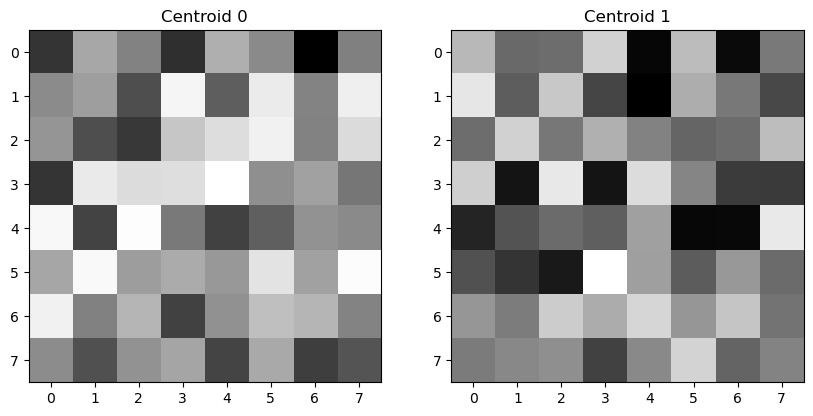

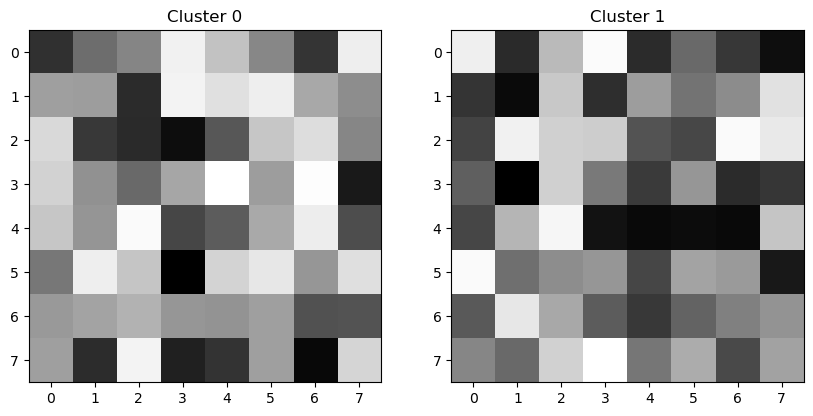

In [6]:
import random
import matplotlib.pyplot as plt

# Simulate a small image dataset (10 images, each 8x8 pixels, grayscale)
def simulate_image_dataset(num_images, height, width):
    return [[[random.random() for _ in range(width)] for _ in range(height)] for _ in range(num_images)]

# Vectorize a 2D image tensor (flatten the tensor into a vector)
def tensor_to_vector(tensor):
    return [element for row in tensor for element in row]

# Compute dot product between two vectors
def dot_product(vec1, vec2):
    return sum(v1 * v2 for v1, v2 in zip(vec1, vec2))

# Compute the tensor distance between two tensors (based on vectorization)
def tensor_distance(tensor1, tensor2):
    vec1 = tensor_to_vector(tensor1)
    vec2 = tensor_to_vector(tensor2)
    diff_vec = [v1 - v2 for v1, v2 in zip(vec1, vec2)]
    return dot_product(diff_vec, diff_vec)  # Euclidean distance

# Recompute the centroid (average image tensor) of the cluster
def recompute_centroid(cluster):
    if len(cluster) == 0:
        return None
    
    height = len(cluster[0])
    width = len(cluster[0][0])
    
    # Initialize a new centroid tensor filled with zeros
    new_centroid = [[0 for _ in range(width)] for _ in range(height)]
    
    # Sum all tensors in the cluster
    for tensor in cluster:
        for i in range(height):
            for j in range(width):
                new_centroid[i][j] += tensor[i][j]
    
    # Divide by the number of tensors to get the mean
    cluster_size = len(cluster)
    for i in range(height):
        for j in range(width):
            new_centroid[i][j] /= cluster_size
                
    return new_centroid

# Tensor K-Means Algorithm
def tensor_kmeans(tensors, K, max_iterations=100):
    # Step 1: Randomly select K tensors as initial centroids
    centroids = random.sample(tensors, K)
    
    for iteration in range(max_iterations):
        # Step 2: Assign each tensor to the nearest centroid
        clusters = [[] for _ in range(K)]
        for tensor in tensors:
            distances = [tensor_distance(tensor, centroid) for centroid in centroids]
            nearest_centroid_index = distances.index(min(distances))
            clusters[nearest_centroid_index].append(tensor)
        
        # Step 3: Recompute centroids
        new_centroids = []
        for cluster in clusters:
            new_centroid = recompute_centroid(cluster)
            new_centroids.append(new_centroid)
        
        # Step 4: Check for convergence (if centroids don't change)
        if new_centroids == centroids:
            break
        
        centroids = new_centroids
    
    return centroids, clusters

# Generate random images as tensors
num_images = 10
image_height = 8
image_width = 8
images = simulate_image_dataset(num_images, image_height, image_width)

# Run Tensor K-Means with K=2 clusters
K = 2
centroids, clusters = tensor_kmeans(images, K)

# Visualize centroids as images
def plot_centroids(centroids):
    fig, axs = plt.subplots(1, len(centroids), figsize=(5 * len(centroids), 5))
    for idx, centroid in enumerate(centroids):
        axs[idx].imshow(centroid, cmap='gray')
        axs[idx].set_title(f'Centroid {idx}')
    plt.show()

# Visualize clustering result by plotting images grouped by clusters
def plot_clusters(clusters):
    fig, axs = plt.subplots(1, len(clusters), figsize=(10, 5))
    for idx, cluster in enumerate(clusters):
        axs[idx].imshow(cluster[0], cmap='gray')
        axs[idx].set_title(f'Cluster {idx}')
    plt.show()

# Plot the centroids and clusters
plot_centroids(centroids)
plot_clusters(clusters)



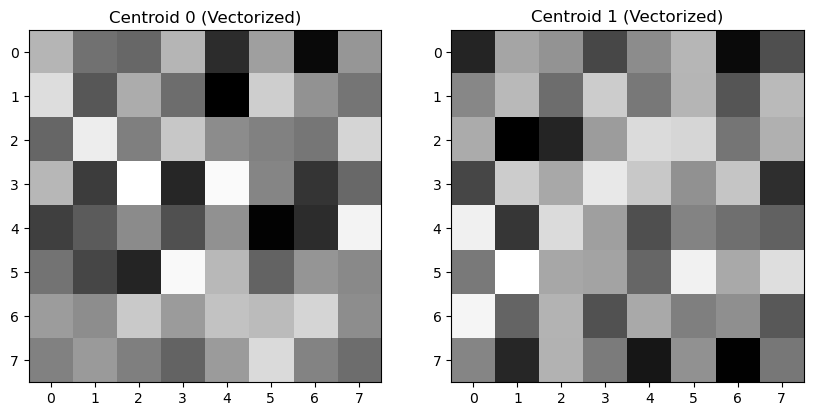

In [7]:
# Traditional K-means on vectorized images (without Tensor treatment)
def kmeans_vectorized(images, K, max_iterations=100):
    vectorized_images = [tensor_to_vector(image) for image in images]
    centroids = random.sample(vectorized_images, K)
    
    for iteration in range(max_iterations):
        clusters = [[] for _ in range(K)]
        for vec in vectorized_images:
            distances = [dot_product([v1 - v2 for v1, v2 in zip(vec, c)], [v1 - v2 for v1, v2 in zip(vec, c)]) for c in centroids]
            nearest_centroid_index = distances.index(min(distances))
            clusters[nearest_centroid_index].append(vec)
        
        new_centroids = []
        for cluster in clusters:
            centroid = [sum(vec[i] for vec in cluster) / len(cluster) for i in range(len(cluster[0]))]
            new_centroids.append(centroid)
        
        if new_centroids == centroids:
            break
        
        centroids = new_centroids
    
    return centroids, clusters

# Run traditional K-Means on vectorized images
centroids_vec, clusters_vec = kmeans_vectorized(images, K)

# Visualize the centroids from traditional K-Means
def plot_centroids_vectorized(centroids_vec, image_height, image_width):
    fig, axs = plt.subplots(1, len(centroids_vec), figsize=(5 * len(centroids_vec), 5))
    for idx, centroid in enumerate(centroids_vec):
        centroid_image = [centroid[i:i + image_width] for i in range(0, len(centroid), image_width)]
        axs[idx].imshow(centroid_image, cmap='gray')
        axs[idx].set_title(f'Centroid {idx} (Vectorized)')
    plt.show()

plot_centroids_vectorized(centroids_vec, image_height, image_width)


# Similarity Measures in Machine Learning

One of the main mathematical tools for unsupervised clustering and classification is the distance measure. The distance between two vectors $ p $ and $ g $, denoted by $ D(p, g) $, is a measure if it has the following properties:

1. **Nonnegativity and Positiveness**: 
   $$ 
   D(p, g) \geq 0, \text{ and equality holds if and only if } p = g. 
   $$

2. **Symmetry**: 
   $$ 
   D(p, g) = D(g, p). 
   $$

3. **Triangle Inequality**: 
   $$ 
   D(p, z) \leq D(p, g) + D(g, z). 
   $$

The basic rule of unsupervised clustering and classification is to adopt some distance metric to measure the similarity of two feature vectors. As the name suggests, this similarity is a measure of the degree of similarity between vectors.

Consider a clustering problem in pattern recognition (e.g., template matching). For simplicity, suppose that there are $ N $ pattern vectors $ s_1, \ldots, s_N $, but the number of classes is unknown. Our problem is to cluster $ N $ pattern vectors into a number of classes. For this purpose, we need to compare these pattern vectors in order to be clustered into a number of classes such that pattern vectors belonging to the same class are more similar than those belonging to other classes. On the basis of a similarity comparison, we can obtain the unsupervised pattern clustering.

A quantity known as the dissimilarity is used to make a reverse measurement of the similarity between vectors: two vectors with a smaller dissimilarity are more similar. Let $ D(s_i, s_j) $ (for $ i, j = 1, \ldots, N $, but $ j \neq i $) be the dissimilarities between the $ i $-th and $ j $-th pattern vectors $ s_i $ and $ s_j $. If

$$ 
D(s_i, s_{j_1}) < D(s_i, s_{j_2}), 
$$

then we say the pattern vector $ s_{j_1} $ is more similar to $ s_i $ than $ s_{j_2} $.

The simplest and most intuitive dissimilarity parameter is the Euclidean distance between vectors. The regularized Euclidean distance between the $ i $-th and the $ j $-th known pattern vectors $ (s_i, s_j) $, denoted $ D_E(s_i, s_j) $, is defined as:

$$ 
D_E(s_i, s_j) = \frac{\|s_i - s_j\|^2}{\|s_i\|^2 + \|s_j\|^2}. 
$$

Two extreme values imply that two vectors are completely similar and completely dissimilar, respectively:

$$ 
D_E(x, y) =
\begin{cases}
0 & \text{if } x \text{ and } y \text{ are completely similar,} \\
1 & \text{if } x \text{ and } y \text{ are completely dissimilar.}
\end{cases} 
If 

$$ 
D_E(s_1, s_i) = \min_{k} D_E(s_1, s_k), \quad k = 1, \ldots, N, \, i \neq 1, 
$$ 

then $ s_i $ is said to be a nearest neighbor to $ s_1 $. A widely used classification method is nearest neighbor classification, which judges $ s_1 $ and $ s_i $ to belong to the same model type.

All pattern vectors satisfying 

$$ 
D_E(s_1, s_j) \approx D_E(s_1, s_i), \quad j = 2, \ldots, N, \, j \neq i, 
$$ 

are said to be the nearest neighbors to $ s_1 $ as well, and thus these pattern vectors are judged to belong to Class 1. Mimicking this process for other unclustered pattern vectors until all vectors are clustered, we can cluster all other possible classes (Class 2, Class 3, and so on) and determine the number of classes. This is the basic idea of the unsupervised clustering approach.

Another frequently used distance function is the Mahalanobis distance, proposed by Mahalanobis in 1936. The Mahalanobis distance from the vector $ x $ to its mean $ \mu $ is given by

$$ 
D_M(x, \mu) = (x - \mu)^T C^{-1} (x - \mu), 
$$ 

where $ C_x = \text{cov}(x, x) = E\{(x - \mu)(x - \mu)^T\} $ is the autocovariance matrix of the vector $ x $.

The Mahalanobis distance between vectors $ x \in \mathbb{R}^n $ and $ y \in \mathbb{R}^n $ is denoted by $ D_M(x, y) $ and is defined as

$$ 
D_M(x, y) = (x - y)^T C_{xy}^{-1} (x - y), 
$$ 

where $ C_{xy} = \text{cov}(x, y) = E\{(x - \mu_x)(y - \mu_y)^T\} $ is the cross-covariance matrix of $ x $ and $ y $, while $ \mu_x $ and $ \mu_y $ are the means of $ x $ and $ y $, respectively.

Clearly, if the covariance matrix is the identity matrix, i.e., $ C = I $, then the Mahalanobis distance reduces to the Euclidean distance. If the covariance matrix takes a diagonal form, then the corresponding Mahalanobis distance is called the normalized Euclidean distance and is given by

$$ 
D_M(x, y) = \sqrt{\sum_{i=1}^{n} \frac{(x_i - y_i)^2}{\sigma_i^2}}, 
$$ 

in which $ \sigma_i $ is the standard deviation of $ x_i $ and $ y_i $ in the whole sample set.


In [8]:
# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    """Calculate the Euclidean distance between two vectors."""
    return sum((x - y) ** 2 for x, y in zip(a, b)) ** 0.5

# Function to calculate the mean of a list of vectors
def mean_vector(vectors):
    """Calculate the mean vector from a list of vectors."""
    return [sum(dim) / len(vectors) for dim in zip(*vectors)]

# Function to calculate the covariance matrix
def covariance_matrix(vectors):
    """Calculate the covariance matrix of a list of vectors."""
    mean = mean_vector(vectors)
    n = len(vectors)
    cov_matrix = [[0] * len(mean) for _ in range(len(mean))]

    for vector in vectors:
        for i in range(len(mean)):
            for j in range(len(mean)):
                cov_matrix[i][j] += (vector[i] - mean[i]) * (vector[j] - mean[j])
    
    return [[val / (n - 1) for val in row] for row in cov_matrix]

# Function to calculate the inverse of a 2D matrix
def inverse_matrix(matrix):
    """Calculate the inverse of a 2x2 matrix."""
    det = matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    if det == 0:
        raise ValueError("Matrix is not invertible.")
    return [[matrix[1][1] / det, -matrix[0][1] / det],
            [-matrix[1][0] / det, matrix[0][0] / det]]

# Function to calculate Mahalanobis distance
def mahalanobis_distance(x, y, cov):
    """Calculate the Mahalanobis distance between two vectors."""
    diff = [a - b for a, b in zip(x, y)]
    inv_cov = inverse_matrix(cov)
    return sum(diff[i] * sum(inv_cov[i][j] * diff[j] for j in range(len(diff))) for i in range(len(diff)))

# Nearest neighbor classification function
def nearest_neighbor_classification(training_data, test_vector):
    """Classify the test_vector based on nearest neighbor classification."""
    min_distance = float('inf')
    nearest_neighbor = None
    
    for train_vector in training_data:
        distance = euclidean_distance(train_vector[:-1], test_vector)  # Exclude class label
        if distance < min_distance:
            min_distance = distance
            nearest_neighbor = train_vector[-1]  # Class label
    
    return nearest_neighbor

# Example usage
training_data = [
    [1.0, 2.0, 'Class A'],
    [2.0, 3.0, 'Class A'],
    [3.0, 3.5, 'Class B'],
    [5.0, 4.0, 'Class B']
]

# Test vector
test_vector = [2.5, 3.0]

# Classify the test vector
predicted_class = nearest_neighbor_classification(training_data, test_vector)
print(f'The predicted class for the test vector {test_vector} is: {predicted_class}')

# Calculate Mahalanobis distance between two points
x = [2.0, 3.0]
y = [3.0, 4.0]
cov = covariance_matrix(training_data)  # Use training data for covariance
mahalanobis_dist = mahalanobis_distance(x, y, cov)

print(f'The Mahalanobis distance between {x} and {y} is: {mahalanobis_dist}')


The predicted class for the test vector [2.5, 3.0] is: Class A


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [9]:
# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    """Calculate the Euclidean distance between two vectors."""
    return sum((x - y) ** 2 for x, y in zip(a, b)) ** 0.5

# Function to calculate the mean of a list of vectors (excluding class labels)
def mean_vector(vectors):
    """Calculate the mean vector from a list of vectors."""
    # Exclude the last element (class label) when calculating the mean
    return [sum(dim) / len(vectors) for dim in zip(*[v[:-1] for v in vectors])]

# Function to calculate the covariance matrix
def covariance_matrix(vectors):
    """Calculate the covariance matrix of a list of vectors."""
    mean = mean_vector(vectors)
    n = len(vectors)
    cov_matrix = [[0] * (len(mean)) for _ in range(len(mean))]

    for vector in vectors:
        for i in range(len(mean)):
            for j in range(len(mean)):
                cov_matrix[i][j] += (vector[i] - mean[i]) * (vector[j] - mean[j])
    
    return [[val / (n - 1) for val in row] for row in cov_matrix]

# Function to calculate the inverse of a 2D matrix (only for 2x2 matrices)
def inverse_matrix(matrix):
    """Calculate the inverse of a 2x2 matrix."""
    det = matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    if det == 0:
        raise ValueError("Matrix is not invertible.")
    return [[matrix[1][1] / det, -matrix[0][1] / det],
            [-matrix[1][0] / det, matrix[0][0] / det]]

# Function to calculate Mahalanobis distance
def mahalanobis_distance(x, y, cov):
    """Calculate the Mahalanobis distance between two vectors."""
    diff = [a - b for a, b in zip(x, y)]
    inv_cov = inverse_matrix(cov)
    return sum(diff[i] * sum(inv_cov[i][j] * diff[j] for j in range(len(diff))) for i in range(len(diff)))

# Nearest neighbor classification function
def nearest_neighbor_classification(training_data, test_vector):
    """Classify the test_vector based on nearest neighbor classification."""
    min_distance = float('inf')
    nearest_neighbor = None
    
    for train_vector in training_data:
        distance = euclidean_distance(train_vector[:-1], test_vector)  # Exclude class label
        if distance < min_distance:
            min_distance = distance
            nearest_neighbor = train_vector[-1]  # Class label
    
    return nearest_neighbor

# Example usage
training_data = [
    [1.0, 2.0, 'Class A'],
    [2.0, 3.0, 'Class A'],
    [3.0, 3.5, 'Class B'],
    [5.0, 4.0, 'Class B']
]

# Test vector
test_vector = [2.5, 3.0]

# Classify the test vector
predicted_class = nearest_neighbor_classification(training_data, test_vector)
print(f'The predicted class for the test vector {test_vector} is: {predicted_class}')

# Calculate Mahalanobis distance between two points
x = [2.0, 3.0]
y = [3.0, 4.0]
cov = covariance_matrix(training_data)  # Use training data for covariance
mahalanobis_dist = mahalanobis_distance(x, y, cov)

print(f'The Mahalanobis distance between {x} and {y} is: {mahalanobis_dist}')


The predicted class for the test vector [2.5, 3.0] is: Class A
The Mahalanobis distance between [2.0, 3.0] and [3.0, 4.0] is: 3.7941176470588296


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import mnist

# Load MNIST dataset
def load_mnist():
    """Load MNIST dataset."""
    train_images = mnist.train_images()
    train_labels = mnist.train_labels()
    test_images = mnist.test_images()
    test_labels = mnist.test_labels()
    
    return train_images, train_labels, test_images, test_labels

# Preprocess images: flattening
def preprocess_images(images):
    """Flatten images for classification."""
    return images.reshape(images.shape[0], -1)

# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Nearest neighbor classification function
def nearest_neighbor_classification(train_data, train_labels, test_data):
    predictions = []
    for test_vector in test_data:
        distances = [euclidean_distance(test_vector, train_vector) for train_vector in train_data]
        nearest_index = np.argmin(distances)
        predictions.append(train_labels[nearest_index])
    return np.array(predictions)

# Main function to run the comparison
def main():
    # Load and preprocess data
    train_images, train_labels, test_images, test_labels = load_mnist()
    train_images = preprocess_images(train_images)
    test_images = preprocess_images(test_images)

    # Classify using nearest neighbor
    nn_predictions = nearest_neighbor_classification(train_images, train_labels, test_images)

    # Calculate accuracy
    nn_accuracy = np.mean(nn_predictions == test_labels)
    print(f'Nearest Neighbor Accuracy: {nn_accuracy * 100:.2f}%')

    # Plot some predictions
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Pred: {nn_predictions[i]}, True: {test_labels[i]}')
        plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


ModuleNotFoundError: No module named 'mnist'

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function to load images from a directory
def load_images_from_folder(folder):
    """Load images and labels from a specified folder."""
    images = []
    labels = []
    
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                img = Image.open(img_path).convert('L')  # Convert to grayscale
                img = img.resize((28, 28))  # Resize to 28x28
                img_data = np.array(img).flatten() / 255.0  # Normalize pixel values
                images.append(img_data)
                labels.append(label)  # Use folder name as label
    
    return np.array(images), np.array(labels)

# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Nearest neighbor classification function
def nearest_neighbor_classification(train_data, train_labels, test_data):
    predictions = []
    for test_vector in test_data:
        distances = [euclidean_distance(test_vector, train_vector) for train_vector in train_data]
        nearest_index = np.argmin(distances)
        predictions.append(train_labels[nearest_index])
    return np.array(predictions)

# Function to calculate the mean vector
def mean_vector(vectors):
    return np.mean(vectors, axis=0)

# Function to calculate the covariance matrix
def covariance_matrix(vectors):
    return np.cov(vectors, rowvar=False)

# Function to calculate the inverse of a covariance matrix
def inverse_matrix(matrix):
    return np.linalg.inv(matrix)

# Function to calculate Mahalanobis distance
def mahalanobis_distance(x, y, cov):
    diff = x - y
    inv_cov = inverse_matrix(cov)
    return np.sqrt(np.dot(np.dot(diff.T, inv_cov), diff))

# Mahalanobis classification function
def mahalanobis_classification(train_data, train_labels, test_data):
    predictions = []
    cov = covariance_matrix(train_data)
    
    for test_vector in test_data:
        distances = [mahalanobis_distance(test_vector, train_vector, cov) for train_vector in train_data]
        nearest_index = np.argmin(distances)
        predictions.append(train_labels[nearest_index])
    
    return np.array(predictions)

# Main function to run the comparison
def main():
    # Load images
    train_data, train_labels = load_images_from_folder('cd/train')
    test_data, test_labels = load_images_from_folder('cd/validation')

    # Classify using nearest neighbor
    nn_predictions = nearest_neighbor_classification(train_data, train_labels, test_data)
    nn_accuracy = np.mean(nn_predictions == test_labels)

    # Classify using Mahalanobis distance
    md_predictions = mahalanobis_classification(train_data, train_labels, test_data)
    md_accuracy = np.mean(md_predictions == test_labels)

    print(f'Nearest Neighbor Accuracy: {nn_accuracy * 100:.2f}%')
    print(f'Mahalanobis Distance Accuracy: {md_accuracy * 100:.2f}%')

    # Plot comparison
    plt.bar(['Nearest Neighbor', 'Mahalanobis Distance'], [nn_accuracy, md_accuracy])
    plt.ylabel('Accuracy')
    plt.title('Comparison of Classification Approaches')
    plt.ylim(0, 1)
    plt.show()

if __name__ == "__main__":
    main()


Let 
$$
\mu = \frac{1}{N} \sum_{i=1}^{N} s_i, 
\quad C = \sum_{i=1}^{N} \sum_{j=1}^{N} (s_i - \mu)(s_j - \mu)^T
\tag{6.12.9}
$$
be the sample mean vector of \( N \) known pattern vectors \( s_i \) and the sample cross-covariance matrix. 

Then, the Mahalanobis distance from the \( i \)-th pattern vector \( s_i \) to the \( j \)-th pattern vector \( s_j \) is defined as:
$$
D_M(s_i, s_j) = (s_i - s_j)^T C^{-1} (s_i - s_j)
\tag{6.12.10}
$$

By the nearest neighbor classification method, if:
$$
D_M(s_1, s_i) = \min_{k=1, \dots, M} D_M(s_1, s_k)
\tag{6.12.11}
$$
then the pattern vector \( s_i \) is recognized as belonging to the same pattern type as \( s_1 \).

### Cosine Similarity

The cosine similarity between vectors is given by:
$$
D(x, s_i) = \cos \theta_i = \frac{x^T s_i}{\|x\|_2 \|s_i\|_2}
\tag{6.12.12}
$$
If $ \cos \theta_i < \cos \theta_j $, for all $ j \neq i $, then the unknown pattern vector $ x $ is said to be most similar to the known pattern vector $ s_i $.

### Tanimoto Measure

The Tanimoto similarity measure is:
$$
D(x, s_i) = \frac{x^T s_i}{x^T x + s_i^T s_i - x^T s_i}
\tag{6.12.13}
$$
This is widely used in applications such as information retrieval, disease classification, etc.

### Nearest Neighbor Classification

Given a test pattern vector $ x $ and $ m $ clustered classes, the mean vector of the $ i $-th class is:
$$
\bar{s}^{(i)} = \frac{1}{N_i} \sum_{k=1}^{N_i} s_k^{(i)},
\tag{6.12.14}
$$
where $ N_i $ is the number of pattern vectors in the $ i $-th class. We decide that $ x $ belongs to Class $ i $, if:
$$
D(x, \bar{s}^{(i)}) = \min_{k=1, \dots, m} D(x, \bar{s}^{(k)}).
\tag{6.12.15}
$$

### Similarity Matrix

For $ N $ objects $ x_1, \dots, x_N $, the similarity matrix $ S = [s_{ij}]_{N,N} $ is defined as:
$$
s_{ij} = s(x_i, x_j), \quad i = 1, \dots, N; \ j = 1, \dots, N,
\tag{6.12.17}
$$
with $ s_{ii} = s(x_i, x_i) = 0 $.

Similarly, the distance matrix $ D = [d_{ij}]_{N,N} $ is defined as:
$$
d_{ij} = d(x_i, x_j), \quad i = 1, \dots, N; \ j = 1, \dots, N,
\tag{6.12.18}
$$
with $ d_{ii} = d(x_i, x_i) = 0 $.

Both similarity and distance matrices are symmetric and nonnegative:
$$
S^T = S, \quad S \geq 0.
\tag{6.12.19}
$$

In [ ]:
import math

# Helper functions for vector operations
def dot_product(v1, v2):
    return sum([v1[i] * v2[i] for i in range(len(v1))])

def vector_subtraction(v1, v2):
    return [v1[i] - v2[i] for i in range(len(v1))]

def vector_magnitude(v):
    return math.sqrt(sum([v[i] ** 2 for i in range(len(v))]))

def covariance_matrix(data):
    """Compute the covariance matrix of the dataset."""
    mean_vector = [sum(col) / len(col) for col in zip(*data)]
    n = len(data)
    d = len(data[0])
    cov_matrix = [[0 for _ in range(d)] for _ in range(d)]
    
    for i in range(d):
        for j in range(d):
            cov_matrix[i][j] = sum((data[k][i] - mean_vector[i]) * (data[k][j] - mean_vector[j]) for k in range(n)) / (n - 1)
    return cov_matrix

def inverse_matrix(matrix):
    """Find the inverse of a 2x2 matrix (for simplicity)."""
    determinant = matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    if determinant == 0:
        raise ValueError("Matrix is not invertible")
    inv_det = 1 / determinant
    return [[matrix[1][1] * inv_det, -matrix[0][1] * inv_det],
            [-matrix[1][0] * inv_det, matrix[0][0] * inv_det]]

def mahalanobis_distance(v1, v2, covariance_matrix):
    """Compute the Mahalanobis distance between two vectors."""
    diff = vector_subtraction(v1, v2)
    inv_cov_matrix = inverse_matrix(covariance_matrix)
    temp = dot_product(diff, [dot_product(row, diff) for row in inv_cov_matrix])
    return math.sqrt(temp)

# Cosine similarity
def cosine_similarity(v1, v2):
    return dot_product(v1, v2) / (vector_magnitude(v1) * vector_magnitude(v2))

# Tanimoto measure
def tanimoto_measure(v1, v2):
    dot_prod = dot_product(v1, v2)
    return dot_prod / (dot_product(v1, v1) + dot_product(v2, v2) - dot_prod)

# Nearest neighbor classification
def nearest_neighbor_classification(test_vector, data_vectors, distance_function):
    distances = [(i, distance_function(test_vector, v)) for i, v in enumerate(data_vectors)]
    distances.sort(key=lambda x: x[1])  # Sort by distance
    return distances[0][0]  # Return the index of the nearest neighbor

# Example dataset (replace with your actual data)
data_vectors = [
    [1, 2], [2, 3], [3, 4], [5, 6], [8, 9]
]

test_vector = [4, 5]

# Covariance matrix for Mahalanobis distance
cov_matrix = covariance_matrix(data_vectors)

# Calculate Mahalanobis distance between two vectors
print("Mahalanobis Distance:", mahalanobis_distance(test_vector, data_vectors[0], cov_matrix))

# Calculate Cosine Similarity
print("Cosine Similarity:", cosine_similarity(test_vector, data_vectors[0]))

# Calculate Tanimoto Measure
print("Tanimoto Measure:", tanimoto_measure(test_vector, data_vectors[0]))

# Nearest neighbor classification using cosine similarity
nearest_neighbor = nearest_neighbor_classification(test_vector, data_vectors, cosine_similarity)
print("Nearest Neighbor Index (Cosine Similarity):", nearest_neighbor)
